<h1>Лабораторна робота №3</h1>
<h2>Варіант №3</h2>
<h2>Бонадревська Поліна, ІПС-41</h2>

1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 23, 25, 27

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('NationalNames.csv').dropna()

In [9]:
#1. Виведіть перші 8 рядків набору даних.
data[:8]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


In [8]:
#2. Вивести останні 8 рядків набору даних.
data[-8:]

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


In [10]:
#4. Отримайте загальну інформацію про дані у наборі даних.
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [11]:
#5. Знайдіть кількість унікальних імен у наборі даних
data.drop_duplicates(subset = 'Name').count()['Count']

93889

In [18]:
#6. Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі даних
data.groupby('Gender', as_index=False)['Name'].nunique()

,Gender,Name
0,F,64911
1,M,39199


In [19]:
#7. Знайдіть 5 найпопулярніших чоловічих імен у 2010 році
data.query('Year == 2010 and Gender == "M"').sort_values(by=['Count'], ascending=False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


In [24]:
#8. Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого Count максимальне)
year = 1980
name = data.query(f"Year == {year}").sort_values(by=['Count'], ascending=False)[:1]['Name'].iloc[0]
f"The name is {name} in {year}"

'The name is Michael in 1980'

In [25]:
#9. Підрахуйте кількість записів, для яких Count - мінімальне у наборі.
data.query(f"Count == {data['Count'].min()}")['Count'].size

254615

In [27]:
#10. Підрахуйте кількість унікальних імен у кожному році
data.groupby('Year', as_index=False)['Name'].nunique()

,Year,Name
0,1880,1889
1,1881,1830
2,1882,2012
3,1883,1962
4,1884,2158
...,...,...
130,2010,31603
131,2011,31418
132,2012,31236
133,2013,30774


In [34]:
#11. Знайдіть рік із найбільшою кількістю унікальних імен.
data.groupby('Year')['Name'].nunique().sort_values(ascending=False).head(1).reset_index(name='Names')

,Year,Names
0,2008,32488


In [35]:
#12. Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних імен (тобто у 2008 році)
data.query('Year == 2008').sort_values(by=['Count'], ascending=False)[:1]['Name'].iloc[0]

'Jacob'

In [36]:
#18. Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж хлопчиків.
male = data.query('Gender == "M"').groupby('Year')['Count'].sum()
female = data.query('Gender == "F"').groupby('Year')['Count'].sum()
(female > male).sum()

54

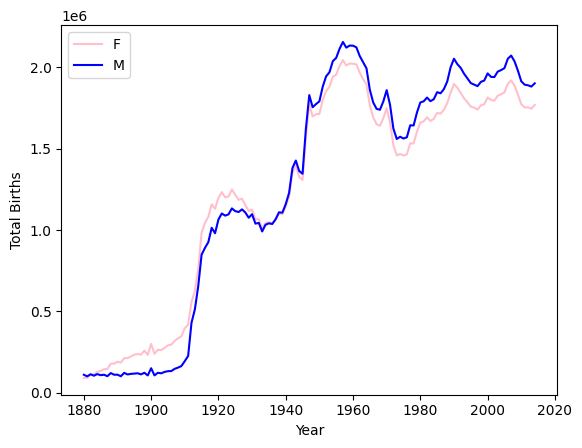

In [39]:
#19. Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік.
plt.plot(female, label='F', color='pink')
plt.plot(male, label='M', color='blue')
# plt.legend(['F', 'M'])
plt.xlabel('Year')
plt.ylabel('Total Births')
plt.legend()

In [42]:
#20. Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)
male = data.query('Gender == "M"')['Name'].drop_duplicates()
female = data.query('Gender == "F"')['Name'].drop_duplicates()
male.isin(female).sum()

10221

In [44]:
#21. Порахуйте, скільки разів хлопчиків називали Barbara
data.query('Name ==  "Barbara" and Gender == "M"')['Count'].sum()

4139

In [54]:
#23. Знати найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року)
male = data.query('Gender == "M"').drop_duplicates(subset=['Name'])
female = data.query('Gender == "F"').drop_duplicates(subset=['Name'])

neutural_names = male[male['Name'].isin(female['Name'])]
years_count = data['Year'].unique().size
neutural_names_all_years = data[data.Name.isin(neutural_names['Name'])].groupby('Name')['Year'].count().sort_values(ascending=False).to_frame().query(f'Year == {years_count * 2}')
data[data.Name.isin(neutural_names_all_years.index)].groupby('Name')['Count'].sum().sort_values(ascending=False).to_frame()

,Count
Name,
James,5129096
John,5106590
Robert,4816785
William,4071368
Joseph,2580687
Jean,480901
Jesse,421406
Leslie,376587
Francis,312147


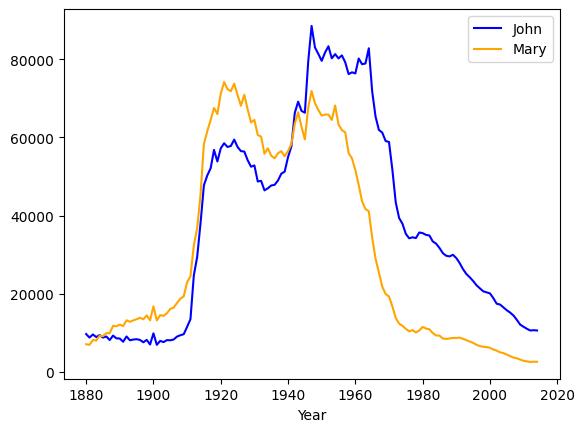

In [58]:
#25. Побудувати графіки розподілення кількості імен John та Mary по роках без залежності до статі.
john = data.query('Name == "John"').groupby('Year')['Count'].sum()
mary = data.query('Name == "Mary"').groupby('Year')['Count'].sum()
plt.plot(john, label='John', color='blue')
plt.plot(mary, label="Mary", color='orange')
plt.xlabel('Year')
plt.legend()
plt.show()

In [60]:
#27. Знайти найпопулярніші імена в кожному році.
data.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']]).reset_index()

,Year,Name,Count
0,1880,John,9655
1,1881,John,8769
2,1882,John,9557
3,1883,John,8894
4,1884,John,9388
...,...,...,...
130,2010,Isabella,22883
131,2011,Sophia,21816
132,2012,Sophia,22267
133,2013,Sophia,21147
